In [338]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

In [2]:
df = sns.load_dataset("titanic")
p3_df = df[["age", "fare", "pclass", "sex", "survived"]].copy()
p3_df = p3_df.dropna()
p3_df['sex'] = p3_df['sex'].replace("male", 0)
p3_df['sex'] = p3_df['sex'].replace("female", 1)
np.random.seed(23)
p3_train, p3_validation = np.split(p3_df, [600])

In [3]:
p3_df.head(5)

,age,fare,pclass,sex,survived
0,22.0,7.2500,3,0,0
1,38.0,71.2833,1,1,1
2,26.0,7.9250,3,1,1
3,35.0,53.1000,1,1,1
4,35.0,8.0500,3,0,0


In [4]:
sample_of_5 = p3_train[["fare", "age", "survived"]].sample(5, random_state = 35)
sample_of_5

,fare,age,survived
366,75.2500,60.0,1
360,27.9000,40.0,0
394,16.7000,24.0,1
206,15.8500,32.0,0
704,7.8542,26.0,0


In [5]:
X = sample_of_5[["fare", "age"]].to_numpy()
y = sample_of_5["survived"].to_numpy()

In [238]:
class NetEasePerceptron():        
    def fit(self, X, y_obs, starting_w = None):               
        N = X.shape[0] # number of observations
        d = X.shape[1] # number of features
        if starting_w is None:
            starting_w = np.zeros(d)
        
        self.w = np.array(starting_w)
        self.b = 0
        self.w_history = []
        self.w_history.append(self.w)
        self.b_history = []
        self.b_history.append(self.b)
        
        num_correct = np.sum(self.predict(X) == y_obs)
        i = 0
        while num_correct < N:            
            self.fit_one_observation(X, y_obs, i)
            i = i + 1
            num_correct = np.sum(self.predict(X) == y_obs)
            

    def fit_one_observation(self, X, y_obs, i):
        """update weights and b using observation i"""
        d = X.shape[1]
        N = X.shape[0]
        
        print(f"attempting to fit observation {i}: {X[i % N, :]}")
        this_y_hat = self.predict(X[i % N])
        this_y_obs = y_obs[i % N]
        if this_y_hat != this_y_obs:
            if this_y_obs == 1:
                self.w = self.w + X[i % N]
                self.b = self.b + 1
            if this_y_obs == 0:
                self.w = self.w - X[i % N]
                self.b = self.b - 1
            self.w_history.append(self.w)
            self.b_history.append(self.b)
        
    def predict(self, X):
        weighted_sums = np.dot(X, self.w) + self.b
        return (weighted_sums > 0) * 1
    
    def predict_proba(self, X):
        def sigma(x):
            return 1/(1 + np.exp(-x))
        
        weighted_sums = np.dot(X, self.w) + self.b
        return sigma(weighted_sums)

        

In [192]:
p = NetEasePerceptron()

In [8]:
p.fit(X, y)

attempting to fit observation 0: [75.25 60.  ]
attempting to fit observation 1: [27.9 40. ]
attempting to fit observation 2: [16.7 24. ]
attempting to fit observation 3: [15.85 32.  ]
attempting to fit observation 4: [ 7.8542 26.    ]
attempting to fit observation 5: [75.25 60.  ]
attempting to fit observation 6: [27.9 40. ]
attempting to fit observation 7: [16.7 24. ]
attempting to fit observation 8: [15.85 32.  ]
attempting to fit observation 9: [ 7.8542 26.    ]
attempting to fit observation 10: [75.25 60.  ]
attempting to fit observation 11: [27.9 40. ]
attempting to fit observation 12: [16.7 24. ]
attempting to fit observation 13: [15.85 32.  ]
attempting to fit observation 14: [ 7.8542 26.    ]
attempting to fit observation 15: [75.25 60.  ]
attempting to fit observation 16: [27.9 40. ]
attempting to fit observation 17: [16.7 24. ]
attempting to fit observation 18: [15.85 32.  ]
attempting to fit observation 19: [ 7.8542 26.    ]
attempting to fit observation 20: [75.25 60.  ]
at

In [9]:
p.predict(X)

array([1, 0, 1, 0, 0])

In [10]:
p.w

array([125.15, -88.  ])

In [11]:
p.b

25

In [12]:
from matplotlib.colors import ListedColormap
def visualize_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    plt.xlabel("fare")
    plt.ylabel("age")

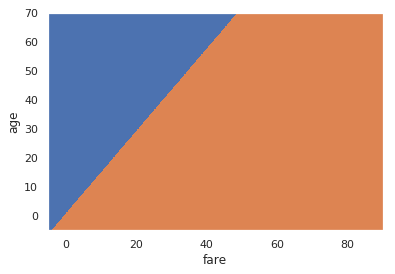

In [13]:
visualize_decision_boundaries(p, [-5, 90], [-5, 70])

#### Hinge Loss

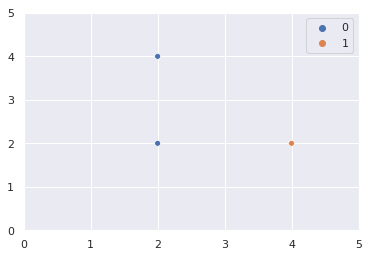

In [70]:
X = np.array([[2, 4], [2, 2], [4, 2]])
y = np.array([0, 0, 1])
sns.scatterplot(X[:, 0], X[:, 1], y)
plt.xlim([0, 5])
plt.ylim([0, 5])
plt.savefig("data_for_hingeloss_problem.png", dpi = 300, bbox_inches = "tight")

In [193]:
p.fit(X, y)

attempting to fit observation 0: [2 4]
attempting to fit observation 1: [2 2]
attempting to fit observation 2: [4 2]
attempting to fit observation 3: [2 4]


In [86]:
p.w

array([ 2., -2.])

In [87]:
p.w[1] = -1

In [104]:
p.w[0] = -1
p.w[1] = 1
p.b = 0

In [105]:
and_df = pd.DataFrame(X, columns = ["x1", "x2"])
and_df["y"] = y
and_df

,x1,x2,y
0,2,4,0
1,2,2,0
2,4,2,1


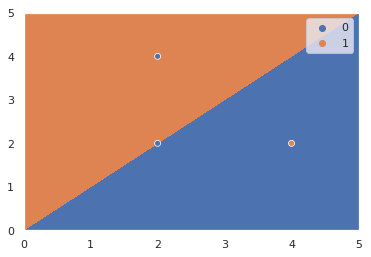

In [106]:
visualize_decision_boundaries(p, [0, 5], [0, 5])
sns.scatterplot(X[:, 0], X[:, 1], y)
plt.xlabel("")
plt.ylabel("")
plt.savefig("hingeloss_question.png", dpi = 300, bbox_inches = "tight")

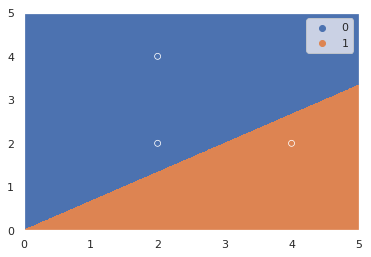

In [155]:
p.w = np.array([2, -3])
visualize_decision_boundaries(p, [0, 5], [0, 5])
sns.scatterplot(X[:, 0], X[:, 1], y)
plt.xlabel("")
plt.ylabel("")
plt.savefig("hingeloss_question2.png", dpi = 300, bbox_inches = "tight")

In [120]:
def hinge_loss(w1, w2, X, y_obs):
    y_hat = X[:, 0]*w1 + X[:, 1]*w2 #b is zero
    y_hat_class = (y_hat > 0) * 1
    wrong_ys = (y_hat_class != y_obs) * 1
    #print(wrong_ys)
    return np.sum(np.abs(y_hat) * wrong_ys)        

In [113]:
hinge_loss(-1, 1, X, y)

[1 0 1]


4

In [163]:
import plotly
import plotly.graph_objs as go
def loss_plot_3d(theta_1_series, theta_2_series, loss_function, x, y):
    """Plot 3D Surface.
        
    The function takes the following as argument:
        theta_1: a list or array of theta_1 value
        theta_2: a list or array of theta_2 value
        loss_function
        x: the original x input
        y: the original y output
    """
    plotly.offline.init_notebook_mode(connected=True)

    # Create loss surface
    #t1_s = np.linspace(np.min(theta_1_series) - 0.1, np.max(theta_1_series) + 0.1)
    #t2_s = np.linspace(np.min(theta_2_series) - 0.1, np.max(theta_2_series) + 0.1)

    x_s, y_s = np.meshgrid(theta_1_series, theta_2_series)
    data = np.stack([x_s.flatten(), y_s.flatten()]).T
    ls = []
    for t1, t2 in data:
        l = loss_function(t1, t2, x, y)
        ls.append(l)
    z = np.array(ls).reshape(len(theta_1_series), len(theta_2_series))

    surface = go.Surface(x=theta_1_series, y=theta_2_series, z=z, colorscale='Viridis')

    # Our plot will be overlay of trace and surface
    data = [surface]

    layout = dict(
        width=800,
        height=700,
        autosize=True,
        title='Loss Surface',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
            ),
            yaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
            ),
            zaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
            ),
            camera=dict(
                up=dict(x=0, y=0, z=1),
                eye=dict(
                    x=-1.7428,
                    y=1.0707,
                    z=0.7100,
                )),
            aspectratio=dict(x=1, y=1, z=0.7),
            aspectmode='manual',
            xaxis_title='w1',
            yaxis_title='w2',
            zaxis_title='Hinge Loss'),
    )

    fig = dict(data=data, layout=layout)

    plotly.offline.iplot(fig)


In [190]:
loss_plot_3d(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50), hinge_loss, X, y)

In [187]:
def loss_contour_plot(theta_1_series, theta_2_series, loss_function,  x, y, flip_axes = False):
    """    
    The function takes the following as argument:
        theta_1: a list or array of theta_1 value
        theta_2: a list or array of theta_2 value
        loss_function
        x: the original x input
        y: the original y output
    """
    t1_s = np.linspace(np.min(theta_1_series) - 0.1, np.max(theta_1_series) + 0.1)
    t2_s = np.linspace(np.min(theta_2_series) - 0.1, np.max(theta_2_series) + 0.1)

    x_s, y_s = np.meshgrid(t1_s, t2_s)
    data = np.stack([x_s.flatten(), y_s.flatten()]).T
    ls = []
    for t1, t2 in data:
        l = loss_function(t1, t2, x, y)
        ls.append(l)
    z = np.array(ls).reshape(50, 50)

    if flip_axes:
        z = z.transpose()

    if not flip_axes:
        contour_x = t1_s
        contour_y = t2_s
    else:
        contour_x = t2_s
        contour_y = t1_s        

    lr_loss_contours = go.Contour(x=contour_x, 
                                  y=contour_y, 
                                  z=z, 
                                  colorscale='Viridis')
    
    contour_fig = go.Figure(data=[lr_loss_contours])
    #contour_fig['layout']['yaxis']['autorange'] = "reversed"
   
    contour_fig['layout']['yaxis']['title'] = "w2"
    contour_fig['layout']['xaxis']['title'] = "w1"
    
    plotly.offline.iplot(contour_fig)

In [188]:
theta0s = np.linspace(-11, 0, 10)
theta1s = np.linspace(0, 0.3, 10)
loss_contour_plot(np.linspace(-5, 5, 12), np.linspace(-5, 5, 12), hinge_loss, X, y)

In [251]:
def loss_plot_3d_with_trace(theta_1_series, theta_2_series, loss_function, x, y, t1_range, t2_range):
    """Plot 3D Surface.
        
    The function takes the following as argument:
        theta_1: a list or array of theta_1 values
        theta_2: a list or array of theta_2 values
        loss_function
        x: the original x input
        y: the original y output
    """
    plotly.offline.init_notebook_mode(connected=True)

    t1_s = np.linspace(t1_range[0], t1_range[1], 50)
    t2_s = np.linspace(t2_range[0], t2_range[1], 50)

    x_s, y_s = np.meshgrid(t1_s, t2_s)
    data = np.stack([x_s.flatten(), y_s.flatten()]).T
    ls = []
    
    
    for t1, t2 in data:
        l = loss_function(t1, t2, x, y)
        ls.append(l)
        
        
    z = np.array(ls).reshape(len(t1_s), len(t2_s))

    surface = go.Surface(x=t1_s, y=t2_s, z=z, colorscale='Viridis')

    trajectory = []
    for i in range(len(theta_1_series)):
        trajectory.append(loss_function(theta_1_series[i], theta_2_series[i], x, y))        
    trajectory = np.array(trajectory)
    
    trace = go.Scatter3d(
        x=theta_1_series,
        y=theta_2_series,
        z=trajectory,
        marker=dict(
            size=4,
            color=-trajectory,
            colorscale='Viridis',
        ),
        line=dict(color='rgb(50,170, 140)', width=3))
    
    
    
    # Our plot will be overlay of trace and surface
    data = [surface, trace]

    layout = dict(
        width=800,
        height=700,
        autosize=True,
        title='Loss Surface',
        scene=dict(
            xaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
            ),
            yaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
            ),
            zaxis=dict(
                gridcolor='rgb(255, 255, 255)',
                zerolinecolor='rgb(255, 255, 255)',
                showbackground=True,
            ),
            camera=dict(
                up=dict(x=0, y=0, z=1),
                eye=dict(
                    x=-1.7428,
                    y=1.0707,
                    z=0.7100,
                )),
            aspectratio=dict(x=1, y=1, z=0.7),
            aspectmode='manual',
            xaxis_title='w1',
            yaxis_title='w2',
            zaxis_title='Hinge Loss'),
    )

    fig = dict(data=data, layout=layout)
    plotly.offline.iplot(fig)

In [286]:
X = np.array([[2, 4], [2, 2], [4, 2]])
y = np.array([0, 0, 1])
p = NetEasePerceptron()
p.fit(X, y, starting_w = np.array([0, 1]))

attempting to fit observation 0: [2 4]
attempting to fit observation 1: [2 2]
attempting to fit observation 2: [4 2]
attempting to fit observation 3: [2 4]
attempting to fit observation 4: [2 2]
attempting to fit observation 5: [4 2]
attempting to fit observation 6: [2 4]
attempting to fit observation 7: [2 2]
attempting to fit observation 8: [4 2]
attempting to fit observation 9: [2 4]
attempting to fit observation 10: [2 2]


In [287]:
p.b_history

[0, -1, 0, -1, 0, -1, 0, -1]

In [288]:
w1_history, w2_history = zip(*p.w_history)
loss_plot_3d_with_trace(w1_history, w2_history, hinge_loss, X, y, [-5, 5], [-5, 5])

In [226]:
X = sample_of_5[["fare", "age"]].to_numpy()
y = sample_of_5["survived"].to_numpy()
p = NetEasePerceptron()
p.fit(X, y)

attempting to fit observation 0: [75.25 60.  ]
attempting to fit observation 1: [27.9 40. ]
attempting to fit observation 2: [16.7 24. ]
attempting to fit observation 3: [15.85 32.  ]
attempting to fit observation 4: [ 7.8542 26.    ]
attempting to fit observation 5: [75.25 60.  ]
attempting to fit observation 6: [27.9 40. ]
attempting to fit observation 7: [16.7 24. ]
attempting to fit observation 8: [15.85 32.  ]
attempting to fit observation 9: [ 7.8542 26.    ]
attempting to fit observation 10: [75.25 60.  ]
attempting to fit observation 11: [27.9 40. ]
attempting to fit observation 12: [16.7 24. ]
attempting to fit observation 13: [15.85 32.  ]
attempting to fit observation 14: [ 7.8542 26.    ]
attempting to fit observation 15: [75.25 60.  ]
attempting to fit observation 16: [27.9 40. ]
attempting to fit observation 17: [16.7 24. ]
attempting to fit observation 18: [15.85 32.  ]
attempting to fit observation 19: [ 7.8542 26.    ]
attempting to fit observation 20: [75.25 60.  ]
at

In [228]:
w1_history, w2_history = zip(*p.w_history)
loss_plot_3d_with_trace(w1_history, w2_history, hinge_loss, X, y)

#### Perceptrons Learning Logical Functions

In [17]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
and_df = pd.DataFrame(X, columns = ["x1", "x2"])
and_df["y"] = y
and_df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


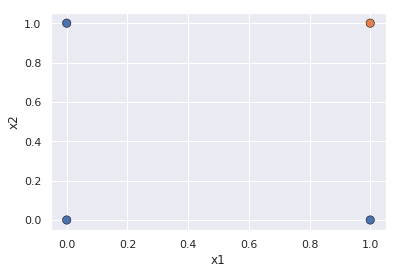

In [18]:
sns.scatterplot(data = and_df, x = "x1", y="x2", hue="y", s = 70, edgecolor = "black", linewidth = 0.5, legend=False)
plt.savefig("and_2d.png", dpi = 300)

In [19]:
and_perceptron = NetEasePerceptron()
and_perceptron.fit(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
                   np.array([0, 0, 0, 1]))

attempting to fit observation 0: [0 0]
attempting to fit observation 1: [0 1]
attempting to fit observation 2: [1 0]
attempting to fit observation 3: [1 1]
attempting to fit observation 4: [0 0]
attempting to fit observation 5: [0 1]
attempting to fit observation 6: [1 0]
attempting to fit observation 7: [1 1]
attempting to fit observation 8: [0 0]
attempting to fit observation 9: [0 1]
attempting to fit observation 10: [1 0]
attempting to fit observation 11: [1 1]
attempting to fit observation 12: [0 0]
attempting to fit observation 13: [0 1]
attempting to fit observation 14: [1 0]
attempting to fit observation 15: [1 1]
attempting to fit observation 16: [0 0]
attempting to fit observation 17: [0 1]


In [20]:
and_perceptron.w

array([2., 1.])

In [21]:
and_perceptron.b

-2

In [22]:
from matplotlib.colors import ListedColormap
def visualize_decision_boundaries(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500),
                     np.linspace(y_range[0], y_range[1], 500))

    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])
    y_hat = model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat = y_hat.reshape(xx.shape)

    cs = plt.contourf(xx, yy, y_hat, cmap=sns_cmap)
    plt.xlabel("fare")
    plt.ylabel("age")

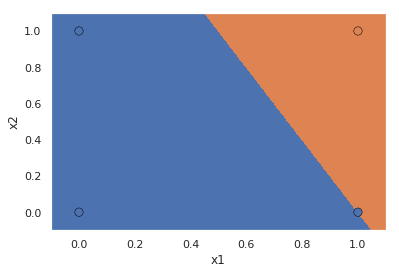

In [23]:
visualize_decision_boundaries(and_perceptron, [-0.1, 1.1], [-0.1, 1.1])
sns.scatterplot(data = and_df, x = "x1", y="x2", hue="y", s = 70, edgecolor = "black", linewidth = 0.5, legend=False)
plt.savefig("and_2d_with_model.png", dpi = 300)

In [238]:
or_perceptron = NetEasePerceptron()
or_perceptron.fit(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
                   np.array([0, 1, 1, 1]))

attempting to fit observation 0: [0 0]
attempting to fit observation 1: [0 1]
attempting to fit observation 2: [1 0]
attempting to fit observation 3: [1 1]
attempting to fit observation 4: [0 0]
attempting to fit observation 5: [0 1]
attempting to fit observation 6: [1 0]
attempting to fit observation 7: [1 1]
attempting to fit observation 8: [0 0]


In [239]:
or_perceptron.w

array([1., 1.])

In [240]:
or_perceptron.b

0

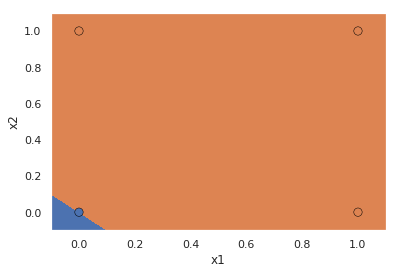

In [243]:
or_df = pd.DataFrame(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), columns = ["x1", "x2"])
or_df["y"] = np.array([0, 1, 1, 1])
visualize_decision_boundaries(or_perceptron, [-0.1, 1.1], [-0.1, 1.1])
sns.scatterplot(data = or_df, x = "x1", y="x2", hue="y", s = 70, edgecolor = "black", linewidth = 0.5, legend=False)
plt.savefig("or_2d_with_model.png", dpi = 300)

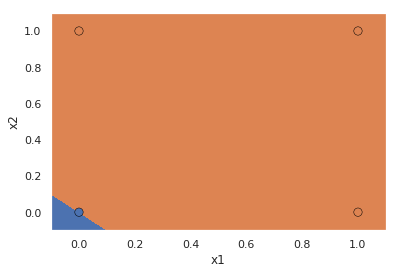

In [243]:
or_df = pd.DataFrame(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), columns = ["x1", "x2"])
or_df["y"] = np.array([0, 1, 1, 1])
visualize_decision_boundaries(or_perceptron, [-0.1, 1.1], [-0.1, 1.1])
sns.scatterplot(data = or_df, x = "x1", y="x2", hue="y", s = 70, edgecolor = "black", linewidth = 0.5, legend=False)
plt.savefig("or_2d_with_model.png", dpi = 300)

In [246]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])
xor_df = pd.DataFrame(X, columns = ["x1", "x2"])
xor_df["y"] = y
xor_df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


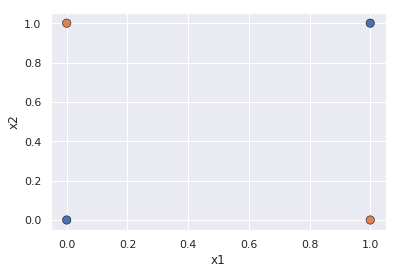

In [247]:
sns.scatterplot(data = xor_df, x = "x1", y="x2", hue="y", s = 70, edgecolor = "black", linewidth = 0.5, legend=False)
plt.savefig("xor_2d.png", dpi = 300)

The code below will get stuck in an infinite loop because the data is not linearly separable.

In [ ]:
xor_perceptron = NetEasePerceptron()
xor_perceptron.fit(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
                   np.array([0, 1, 1, 0]))

To get around this we can add an additional feature, e.g. phi3 = x1 * x2

In [339]:
X = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])
y = np.array([0, 1, 1, 0])
xor_df = pd.DataFrame(X, columns = ["x1", "x2", "phi3"])
xor_df["y"] = y
xor_df

,x1,x2,phi3,y
0,0,0,0,0
1,0,1,0,1
2,1,0,0,1
3,1,1,1,0


In [340]:
xor_perceptron = NetEasePerceptron()
xor_perceptron.fit(np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]),
                   np.array([0, 1, 1, 0]))

attempting to fit observation 0: [0 0 0]
attempting to fit observation 1: [0 1 0]
attempting to fit observation 2: [1 0 0]
attempting to fit observation 3: [1 1 1]
attempting to fit observation 4: [0 0 0]
attempting to fit observation 5: [0 1 0]
attempting to fit observation 6: [1 0 0]
attempting to fit observation 7: [1 1 1]
attempting to fit observation 8: [0 0 0]
attempting to fit observation 9: [0 1 0]
attempting to fit observation 10: [1 0 0]
attempting to fit observation 11: [1 1 1]
attempting to fit observation 12: [0 0 0]
attempting to fit observation 13: [0 1 0]
attempting to fit observation 14: [1 0 0]
attempting to fit observation 15: [1 1 1]
attempting to fit observation 16: [0 0 0]
attempting to fit observation 17: [0 1 0]
attempting to fit observation 18: [1 0 0]
attempting to fit observation 19: [1 1 1]
attempting to fit observation 20: [0 0 0]
attempting to fit observation 21: [0 1 0]
attempting to fit observation 22: [1 0 0]
attempting to fit observation 23: [1 1 1]
at

In [341]:
p.w

array([ 5, -6])

In [342]:
p.b

-2